# 🔄 Preprocessing Data: Cleaning & Preparation 🛠️  
Setelah berhasil melakukan **scraping** data ulasan dari Google Play Store, langkah selanjutnya adalah **preprocessing**.  
Tahap ini bertujuan untuk membersihkan dan menyiapkan data agar siap untuk analisis lebih lanjut.  

---

## 🔧 **Libraries Used**

In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import contractions
from transformers import BertTokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
from symspellpy import SymSpell, Verbosity
from collections import Counter
import langid

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## 📥 **Import Data CSV**

In [2]:
# Import data
file_path = "../data/1_scrapping_running_tracker.csv"
df = pd.read_csv(file_path)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,aaa7089c-2edc-46de-84d1-ef6434a011f2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I really like it,5,0,1.7.4,2025-03-12 09:42:30,NaN,NaN,1.7.4
1,a3f09ed5-3e22-417a-9f95-f80c1fa752ea,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent,5,0,1.7.5,2025-03-12 07:20:52,NaN,NaN,1.7.5
2,a02fb34e-14a1-4345-8b63-dc3b9ddd1f74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,4,0,1.7.4,2025-03-12 06:48:45,Your praise is the greatest encouragement to u...,2025-03-12 14:16:05,1.7.4
3,958e76aa-ba71-4345-96c3-7578fa43126b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,👍,5,0,1.7.4,2025-03-12 06:35:37,NaN,NaN,1.7.4
4,0be62035-3d04-4d3d-b2a6-9efd5c48cbab,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,You can't swipe away notifications,1,0,1.7.4,2025-03-12 06:17:30,"Hi, thanks for your feedback. Could you send u...",2025-03-12 14:47:29,1.7.4


In [3]:
#Hanya akan menampilkan kolom berikut
df.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,I really like it,5,0,1.7.4,2025-03-12 09:42:30,NaN,NaN
1,Excellent,5,0,1.7.5,2025-03-12 07:20:52,NaN,NaN
2,Good,4,0,1.7.4,2025-03-12 06:48:45,Your praise is the greatest encouragement to u...,2025-03-12 14:16:05
3,👍,5,0,1.7.4,2025-03-12 06:35:37,NaN,NaN
4,You can't swipe away notifications,1,0,1.7.4,2025-03-12 06:17:30,"Hi, thanks for your feedback. Could you send u...",2025-03-12 14:47:29
...,...,...,...,...,...,...,...
28931,Pay to use app. What can poor customer do.,2,84,NaN,2019-08-06 00:24:42,NaN,NaN
28932,good,5,5,1.0.6,2019-08-05 22:58:20,NaN,NaN
28933,its not a free app,1,48,NaN,2019-08-04 23:12:46,NaN,NaN
28934,"love this app, especially the map tracker",5,36,1.0.5,2019-08-04 18:50:33,NaN,NaN


## 📊 **Cek Sentiment Analysis**

In [4]:
# Handle None values in 'content' column by replacing them with empty strings
df['sentiment_polarity'] = df['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df['sentiment_subjective'] = df['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [5]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df['sentiment_rating'] = df['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [6]:
df.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,I really like it,5,0.20,0.200000,Positive
1,Excellent,5,1.00,1.000000,Positive
2,Good,4,0.70,0.600000,Positive
3,👍,5,0.00,0.000000,Positive
4,You can't swipe away notifications,1,0.00,0.000000,Negative
...,...,...,...,...,...
28931,Pay to use app. What can poor customer do.,2,-0.40,0.600000,Negative
28932,good,5,0.70,0.600000,Positive
28933,its not a free app,1,-0.20,0.800000,Negative
28934,"love this app, especially the map tracker",5,0.25,0.800000,Positive


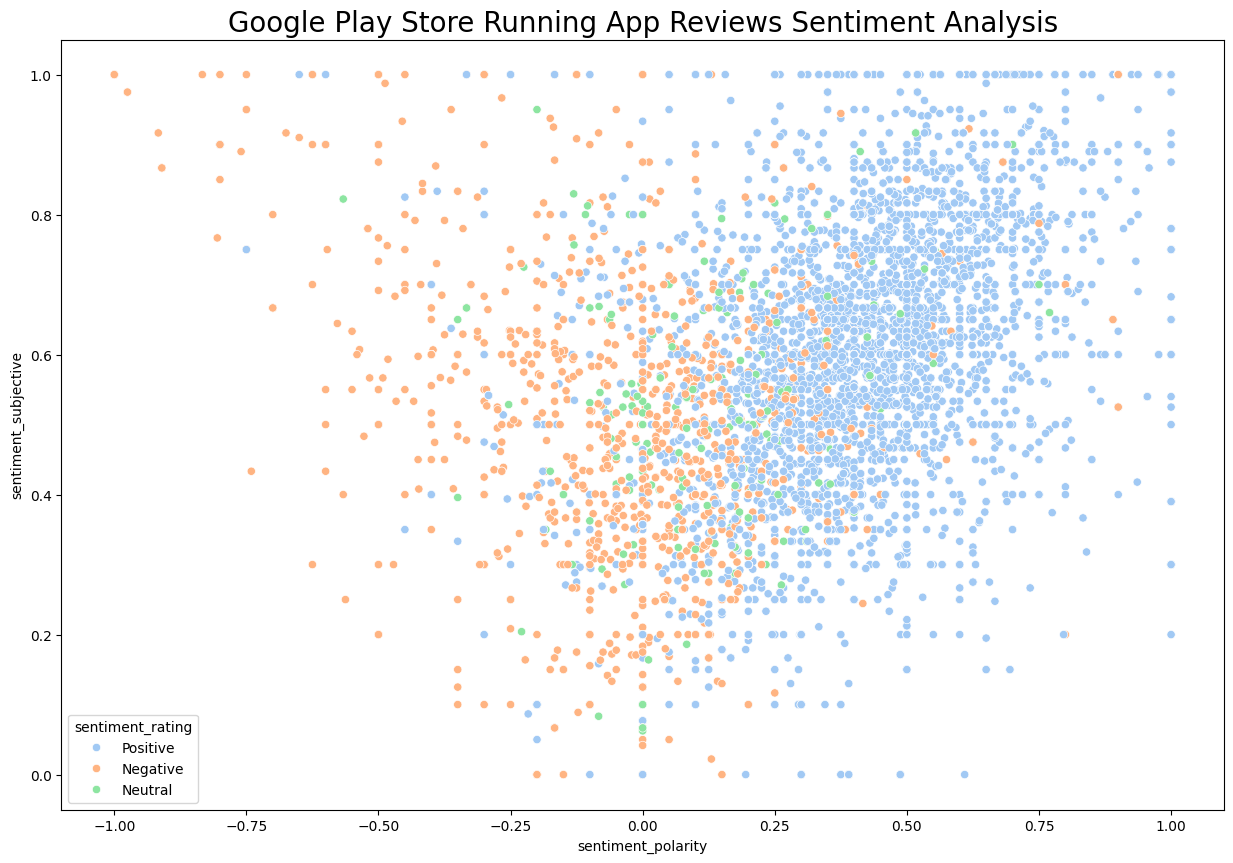

In [7]:
plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df['sentiment_polarity'], y=df['sentiment_subjective'],
                hue=df['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Running App Reviews Sentiment Analysis", fontsize=20)
plt.show()

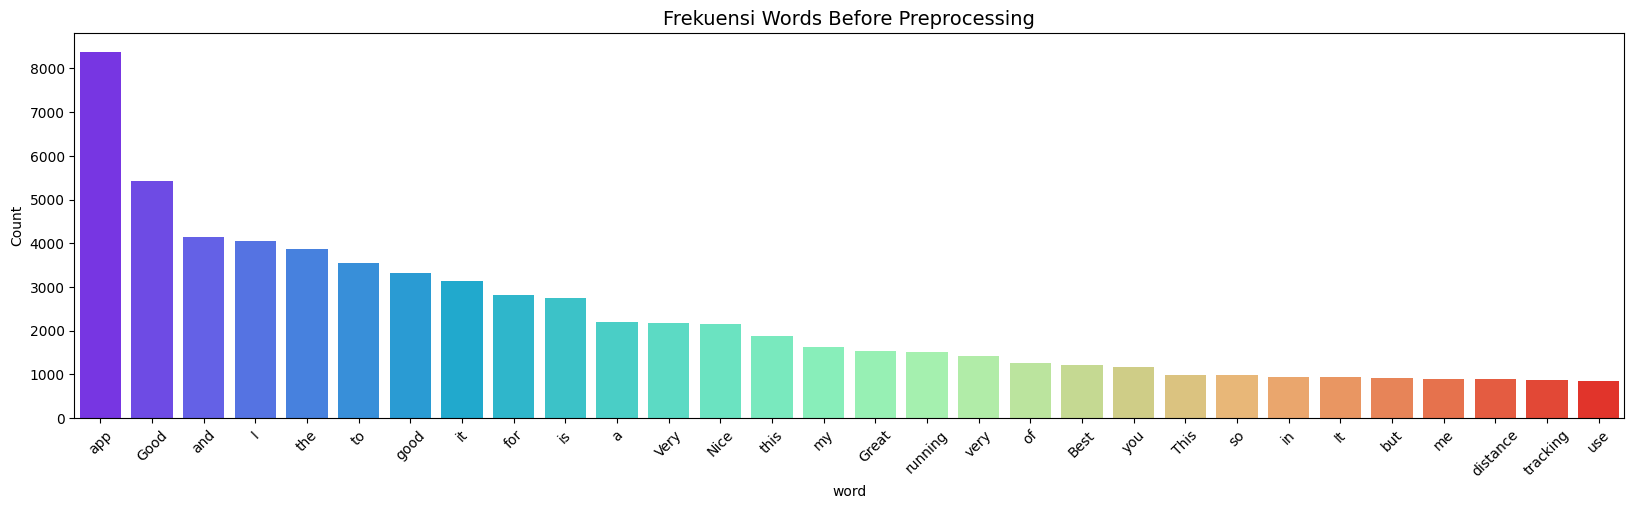

In [8]:
# Function to plot most frequent terms
def freq_words(x, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    # Hitung frekuensi kata
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})

    # Pilih top-n kata paling sering muncul
    d = words_df.nlargest(columns="count", n=terms)

    # Plot dengan seaborn
    plt.figure(figsize=(20, 5))
    ax = sns.barplot(data=d, x="word", y="count", hue="word", palette="rainbow", legend=False)
    ax.set(ylabel='Count')

    # Tambahkan judul
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)  # Rotasi label agar lebih mudah dibaca
    plt.show()

# Panggil fungsi dengan judul yang sesuai
df['content'] = df['content'].fillna('').astype(str)
freq_words(df['content'], title="Frekuensi Words Before Preprocessing")

## 📌 **Tahapan Preprocessing**

### ✅ **1. Handling Missing Values** → Menghapus atau mengisi data yang kosong  

In [9]:
print(df.isnull().sum())

reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     2328
at                          0
replyContent            27722
repliedAt               27722
appVersion               2328
sentiment_polarity          0
sentiment_subjective        0
sentiment_rating            0
dtype: int64


Setelah melakukan pengecekan missing values, ditemukan beberapa kolom dengan nilai kosong:  

| **Kolom**               | **Jumlah Missing Values** | **Penanganan** |
|-------------------------|-------------------------|---------------|
| `content`              | 1                         | **Dihapus** (karena hanya 1 data) |
| `reviewCreatedVersion` | 2,328                     | **Diisi** dengan `"Unknown"` atau modus |
| `replyContent` & `repliedAt` | 27,722          | **Diisi** dengan `"No Reply"` |
| `appVersion`           | 2,328                     | **Diisi** dengan modus atau `"Unknown"` |

---

In [10]:
# Menghapus baris dengan content kosong
df = df.dropna(subset=["content"])  

# Menangani missing values dengan assignment langsung
df["reviewCreatedVersion"] = df["reviewCreatedVersion"].fillna("Unknown")
df["replyContent"] = df["replyContent"].fillna("No Reply")
df["repliedAt"] = df["repliedAt"].fillna("No Reply")
df["appVersion"] = df["appVersion"].fillna("Unknown")

In [11]:
print(df.isnull().sum())

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
sentiment_polarity      0
sentiment_subjective    0
sentiment_rating        0
dtype: int64


### ✅ **2. Expand Contractions** → Mengubah singkatan

Expand contractions dilakukan sebelum tokenisasi karena banyak singkatan dalam bahasa Inggris yang mengandung apostrof (`'`), seperti `"can't"` menjadi `"cannot"` atau `"you're"` menjadi `"you are"`. Jika tokenisasi dilakukan terlebih dahulu, kata yang mengandung apostrof dapat terpisah menjadi token yang tidak bermakna, seperti `"can't"` menjadi `["ca", "n't"]`. Dengan melakukan ekspansi terlebih dahulu, kita memastikan bahwa setiap kata tetap utuh sebelum diproses lebih lanjut dalam analisis teks, sehingga hasil tokenisasi menjadi lebih akurat dan sesuai dengan makna sebenarnya.

In [12]:
def expand_contractions(text):
    """Mengubah singkatan dalam teks menjadi bentuk lengkapnya."""
    return contractions.fix(text)

df["content_expanded"] = df["content"].apply(expand_contractions)
df[["content", "content_expanded"]].head()

,content,content_expanded
0,I really like it,I really like it
1,Excellent,Excellent
2,Good,Good
3,👍,👍
4,You can't swipe away notifications,You cannot swipe away notifications


### ✅ **3. Tokenization** → Memisahkan teks menjadi kata-kata atau unit kecil lainnya.

Dalam proyek ini, tokenisasi dilakukan **menggunakan BERT tokenizer** untuk memproses teks ulasan aplikasi sebelum analisis sentimen. BERT (Bidirectional Encoder Representations from Transformers) dipilih karena memiliki **bidirectional context** , yang memungkinkan model memahami makna kata berdasarkan keseluruhan kalimat, serta **pre-trained model**, yang telah dilatih dengan miliaran kata sehingga meningkatkan akurasi pemrosesan teks. Selain itu, BERT sangat **cocok untuk analisis sentimen**, karena mampu menangkap nuansa emosi dalam teks lebih baik dibandingkan metode tokenisasi tradisional. 

In [13]:
# Tokenisasi menggunakan BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
df["tokens"] = df["content_expanded"].apply(lambda x: tokenizer.tokenize(x))

In [14]:
# Cek hasil tokenisasi
df[["content_expanded", "tokens"]].head()

,content_expanded,tokens
0,I really like it,"[i, really, like, it]"
1,Excellent,[excellent]
2,Good,[good]
3,👍,[[UNK]]
4,You cannot swipe away notifications,"[you, cannot, sw, ##ipe, away, notification, ##s]"


In [15]:
# Menggabungkan kata yang terpisah oleh ##

def merge_subwords(tokens):
    merged_tokens = []
    current_word = ""

    for token in tokens:
        if token.startswith("##"):
            current_word += token[2:]  # Gabungkan tanpa '##'
        else:
            if current_word:
                merged_tokens.append(current_word)  # Simpan kata sebelumnya
            current_word = token  # Mulai kata baru

    if current_word:  # Pastikan kata terakhir masuk
        merged_tokens.append(current_word)

    return merged_tokens

df["tokens_merged"] = df["tokens"].apply(merge_subwords)
df[["tokens", "tokens_merged"]].head()

,tokens,tokens_merged
0,"[i, really, like, it]","[i, really, like, it]"
1,[excellent],[excellent]
2,[good],[good]
3,[[UNK]],[[UNK]]
4,"[you, cannot, sw, ##ipe, away, notification, ##s]","[you, cannot, swipe, away, notifications]"


### ✅ **4. Lowercasing** → Mengubah teks menjadi huruf kecil untuk konsistensi

In [16]:
df["tokens_merged"] = df["tokens_merged"].apply(lambda x: [token.lower() for token in x])

# Cek hasil lowercasing
df[["tokens_merged", "tokens_merged"]].head()

,tokens_merged,tokens_merged
0,"[i, really, like, it]","[i, really, like, it]"
1,[excellent],[excellent]
2,[good],[good]
3,[[unk]],[[unk]]
4,"[you, cannot, swipe, away, notifications]","[you, cannot, swipe, away, notifications]"


### ✅ **5. Stopword Removal** → Menghapus kata-kata umum yang tidak bermakna dalam analisis

In [17]:
# nltk.download("stopwords")

stop_words = set(stopwords.words("english"))
important_words = {"not", "no", "never", "nor", "n't"}  
filtered_stop_words = stop_words - important_words  
filtered_stop_words.add("app")

def remove_stopwords(tokens):
    cleaned_tokens = [
        token.strip() for token in tokens  # Hapus spasi/karakter aneh
        if token.lower() not in filtered_stop_words and len(token) > 2  # Hapus hanya stop words yang tidak penting
    ]
    return cleaned_tokens

df["tokens_cleaned"] = df["tokens_merged"].apply(remove_stopwords)
df[["tokens_merged", "tokens_cleaned"]].head()


,tokens_merged,tokens_cleaned
0,"[i, really, like, it]","[really, like]"
1,[excellent],[excellent]
2,[good],[good]
3,[[unk]],[[unk]]
4,"[you, cannot, swipe, away, notifications]","[cannot, swipe, away, notifications]"


### ✅ **6.  Lemmatization** → Mengubah kata menjadi bentuk dasarnya

Dalam proses ini, kita menggunakan **Lemmatization** untuk mengubah kata ke bentuk dasarnya berdasarkan konteks linguistik. Berbeda dengan **Stemming** yang hanya memotong kata tanpa memperhatikan makna, **Lemmatization mempertahankan makna asli kata**. **BERT Tokenizer sudah memahami konteks kata**, sehingga proses Stemming justru bisa menghilangkan informasi penting yang diperlukan dalam analisis sentimen.  Jadi, proses stemming dilewati.


In [18]:
# nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token, pos="v") for token in tokens]  # 'v' untuk verb

df["tokens_lemmatized"] = df["tokens_cleaned"].apply(lemmatize_tokens)
df[["tokens_cleaned", "tokens_lemmatized"]].head()

,tokens_cleaned,tokens_lemmatized
0,"[really, like]","[really, like]"
1,[excellent],[excellent]
2,[good],[good]
3,[[unk]],[[unk]]
4,"[cannot, swipe, away, notifications]","[cannot, swipe, away, notifications]"


### ✅ **7. Punctuation & Special Characters Removal** → Menghapus tanda baca dan simbol yang tidak relevan.

In [19]:
def clean_tokens(tokens):
    """Menghapus tanda baca dan token [UNK]"""
    return [token for token in tokens if token not in string.punctuation and token.lower() != "[unk]"]

df["tokens_cleaned"] = df["tokens_lemmatized"].apply(clean_tokens)
df[["tokens_lemmatized", "tokens_cleaned"]].head()

,tokens_lemmatized,tokens_cleaned
0,"[really, like]","[really, like]"
1,[excellent],[excellent]
2,[good],[good]
3,[[unk]],[]
4,"[cannot, swipe, away, notifications]","[cannot, swipe, away, notifications]"


### ✅ **8. Spelling Correction** → Memperbaiki kesalahan ejaan.

Untuk meningkatkan akurasi analisis teks, saya menggunakan **SymSpell** sebagai metode *spelling correction*. SymSpell adalah algoritma koreksi ejaan yang sangat cepat karena menggunakan teknik pencocokan berbasis hash dan precomputed edit distance.  

**kamus frekuensi kata berbahasa Inggris** dari repositori SymSpell:  
[SymSpell Frequency Dictionary](https://github.com/wolfgarbe/SymSpell/blob/master/SymSpell/frequency_dictionary_en_82_765.txt)  


In [20]:
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Load dictionary
dictionary_path = "frequency_dictionary_en_82_765.txt"  
if not sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1):
    print("Gagal memuat dictionary. Pastikan file dictionary tersedia di path yang benar.")

def correct_spelling(tokens):
    corrected_tokens = []
    for token in tokens:
        suggestion = sym_spell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestion:
            corrected_tokens.append(suggestion[0].term)
        else:
            corrected_tokens.append(token)  # Jika tidak ada koreksi, gunakan kata asli
    return corrected_tokens

# Terapkan koreksi ejaan pada token yang sudah dibersihkan
df["tokens_spelling_corrected"] = df["tokens_cleaned"].apply(correct_spelling)

# Tampilkan hanya baris yang mengalami perubahan
df_changes = df[df["tokens_cleaned"].astype(str) != df["tokens_spelling_corrected"].astype(str)]
df_changes[["tokens_cleaned", "tokens_spelling_corrected"]].head()


,tokens_cleaned,tokens_spelling_corrected
9,"[veryyy, goood]","[very, good]"
10,"[nice, feature, simple, use, dependable, gps]","[nice, feature, simple, use, dependable, gas]"
12,"[nice, aap]","[nice, map]"
37,"[nice, best, run, ads, funcions, overall, free]","[nice, best, run, ads, functions, overall, free]"
48,"[good, keep, calculate, wrond, distance, use, ...","[good, keep, calculate, wrong, distance, use, ..."


### ✅ **9. Rare Words Removal** → Menghapus kata yang jarang muncul.

Pada tahap ini, kata-kata yang jarang muncul dalam dataset akan dihapus. Rare words sering kali tidak memberikan kontribusi signifikan dalam analisis sentimen karena frekuensinya yang sangat rendah dan cenderung menjadi noise.  

In [21]:
word_counts = Counter(word for tokens in df["tokens_spelling_corrected"] for word in tokens)

# Tentukan threshold (kata muncul kurang dari 5 kali akan dihapus)
rare_threshold = 5  
rare_words = {word for word, count in word_counts.items() if count < rare_threshold}

# Fungsi untuk menghapus rare words dari token
def remove_rare_words(tokens):
    return [word for word in tokens if word not in rare_words]

df["tokens_rare_removed"] = df["tokens_spelling_corrected"].apply(remove_rare_words)

df_changes = df[df["tokens_spelling_corrected"].astype(str) != df["tokens_rare_removed"].astype(str)]
df_changes[["tokens_spelling_corrected", "tokens_rare_removed"]].head()

,tokens_spelling_corrected,tokens_rare_removed
4,"[cannot, swipe, away, notifications]","[cannot, away, notifications]"
10,"[nice, feature, simple, use, dependable, gas]","[nice, feature, simple, use, gas]"
17,"[weight, loss, bat, application]","[weight, loss, application]"
37,"[nice, best, run, ads, functions, overall, free]","[nice, best, run, ads, overall, free]"
55,"[exemplary, good]",[good]


Dalam analisis sentimen ulasan aplikasi, penghapusan kata-kata umum (Common Words Removal) **tidak dilakukan** karena:  

1. **Stopwords sudah dihapus lebih awal** → Kata-kata umum yang tidak bermakna sudah dihilangkan melalui proses stopwords removal.  
2. **Kata-kata umum dapat memiliki makna dalam sentimen** → Kata seperti *"good"*, *"bad"*, atau *"great"* penting untuk menentukan polaritas sentimen.  
3. **Menghindari kehilangan konteks** → Jika terlalu banyak kata dihapus, makna asli dari ulasan bisa berubah atau berkurang.  

### ✅ **10. Language Detection & Filtering** → Mendeteksi bahasa dan menghapus selain bahasa Inggris.

Langkah selanjutnya adalah **mendeteksi bahasa** pada setiap ulasan.  
Karena analisis ini difokuskan pada ulasan berbahasa Inggris, maka ulasan yang terdeteksi menggunakan bahasa lain akan **dihapus**.

In [22]:
def detect_language_langid(tokens):
    text = " ".join(tokens)
    return langid.classify(text)[0]  # Ambil kode bahasa 

df = df.copy()
df.loc[:, "language"] = df["tokens_rare_removed"].apply(detect_language_langid)

print(df["language"].value_counts())

df_non_english = df[df["language"] != "en"]
print(df_non_english[["content", "language"]].head())


language
en    24562
de     1641
nl      550
fr      386
es      383
da      251
it      171
no      131
sv      118
lv       91
fi       76
eu       72
pl       65
id       56
ms       52
ca       46
fa       37
ro       34
et       34
sl       22
ar       21
nb       21
pt       18
af       16
br        9
tl        9
bg        7
ru        7
lb        6
mt        5
wa        5
hi        5
sw        5
vi        4
tr        3
hu        3
cs        2
la        2
eo        2
cy        2
sk        1
hr        1
jv        1
gl        1
nn        1
lt        1
Name: count, dtype: int64
                                              content language
1                                           Excellent       de
8                                                خوبه       fa
17                      Weight loss bat application 😚       es
25   One of the best app, simple and straight forward       de
28  This app is useful for running and we can hear...       br


In [23]:
# Hapus baris yang bukan bahasa Inggris
df = df[df["language"] == "en"].copy()

# Tampilkan jumlah ulasan setelah penghapusan
print(f"Jumlah ulasan setelah filter hanya bahasa Inggris: {len(df)}")

Jumlah ulasan setelah filter hanya bahasa Inggris: 24562


### ✅ **11 .Delete Empty Rows**

Jika sebuah review kehilangan katanya setelah proses preprocessing ini, maka baris tersebut tidak lagi memiliki informasi yang berguna. Oleh karena itu, baris-baris kosong akan dihapus agar dataset tetap bersih dan bermakna untuk analisis sentimen.

In [24]:
# Cek jumlah baris yang memiliki token kosong setelah preprocessing
df_empty = df[df["tokens_rare_removed"].apply(lambda x: len(x) == 0)]
print(f"Jumlah baris kosong: {len(df_empty)}")

Jumlah baris kosong: 1601


In [25]:
# Hapus baris yang kosong
df = df[df["tokens_rare_removed"].apply(lambda x: len(x) > 0)].copy()

# Tampilkan jumlah ulasan setelah penghapusan
print(f"Jumlah ulasan setelah menghapus baris kosong: {len(df)}")

Jumlah ulasan setelah menghapus baris kosong: 22961


## 📊 **Sentiment Analysis after Text Preprocessing**

In [26]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,...,sentiment_subjective,sentiment_rating,content_expanded,tokens,tokens_merged,tokens_cleaned,tokens_lemmatized,tokens_spelling_corrected,tokens_rare_removed,language
0,aaa7089c-2edc-46de-84d1-ef6434a011f2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I really like it,5,0,1.7.4,2025-03-12 09:42:30,No Reply,No Reply,...,0.200000,Positive,I really like it,"[i, really, like, it]","[i, really, like, it]","[really, like]","[really, like]","[really, like]","[really, like]",en
2,a02fb34e-14a1-4345-8b63-dc3b9ddd1f74,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good,4,0,1.7.4,2025-03-12 06:48:45,Your praise is the greatest encouragement to u...,2025-03-12 14:16:05,...,0.600000,Positive,Good,[good],[good],[good],[good],[good],[good],en
4,0be62035-3d04-4d3d-b2a6-9efd5c48cbab,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,You can't swipe away notifications,1,0,1.7.4,2025-03-12 06:17:30,"Hi, thanks for your feedback. Could you send u...",2025-03-12 14:47:29,...,0.000000,Negative,You cannot swipe away notifications,"[you, cannot, sw, ##ipe, away, notification, ##s]","[you, cannot, swipe, away, notifications]","[cannot, swipe, away, notifications]","[cannot, swipe, away, notifications]","[cannot, swipe, away, notifications]","[cannot, away, notifications]",en
5,28ebad27-72a8-4eca-9fce-2905485b078f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great app,5,0,1.7.5,2025-03-12 00:38:33,No Reply,No Reply,...,0.750000,Positive,Great app,"[great, app]","[great, app]",[great],[great],[great],[great],en
6,f9d6dee5-6a10-42ec-8009-16b487a5e075,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Not bad,5,0,1.7.5,2025-03-11 22:23:05,No Reply,No Reply,...,0.666667,Positive,Not bad,"[not, bad]","[not, bad]","[not, bad]","[not, bad]","[not, bad]","[not, bad]",en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28931,4c9cab0f-e4e3-4a0a-911a-0b83869968c5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Pay to use app. What can poor customer do.,2,84,Unknown,2019-08-06 00:24:42,No Reply,No Reply,...,0.600000,Negative,Pay to use app. What can poor customer do.,"[pay, to, use, app, ., what, can, poor, custom...","[pay, to, use, app, ., what, can, poor, custom...","[pay, use, poor, customer]","[pay, use, poor, customer]","[pay, use, poor, customer]","[pay, use, poor]",en
28932,3d06e216-59b9-4a44-903b-71512fe67b60,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,5,1.0.6,2019-08-05 22:58:20,No Reply,No Reply,...,0.600000,Positive,good,[good],[good],[good],[good],[good],[good],en
28933,ff3e4d67-71f2-441c-b491-474109b32b14,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,its not a free app,1,48,Unknown,2019-08-04 23:12:46,No Reply,No Reply,...,0.800000,Negative,its not a free app,"[its, not, a, free, app]","[its, not, a, free, app]","[not, free]","[not, free]","[not, free]","[not, free]",en
28934,b74aacb7-59ee-4d17-a5ca-355e2c503e0c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"love this app, especially the map tracker",5,36,1.0.5,2019-08-04 18:50:33,No Reply,No Reply,...,0.800000,Positive,"love this app, especially the map tracker","[love, this, app, ,, especially, the, map, tra...","[love, this, app, ,, especially, the, map, tra...","[love, especially, map, tracker]","[love, especially, map, tracker]","[love, especially, map, tracker]","[love, especially, map, tracker]",en


In [27]:
# Simpan hanya konten yang telah dibersihkan
df["content_cleaned"] = df["tokens_rare_removed"].apply(lambda x: " ".join(x))

# Cek hasil
display(df[['tokens_rare_removed', 'content_cleaned']])

,tokens_rare_removed,content_cleaned
0,"[really, like]",really like
2,[good],good
4,"[cannot, away, notifications]",cannot away notifications
5,[great],great
6,"[not, bad]",not bad
...,...,...
28931,"[pay, use, poor]",pay use poor
28932,[good],good
28933,"[not, free]",not free
28934,"[love, especially, map, tracker]",love especially map tracker


In [28]:
df_cleaned = df.copy()

In [29]:
df_cleaned = df_cleaned.drop(columns=[
    'content',
    'sentiment_polarity',
    'sentiment_subjective',
    'sentiment_rating',
    'content_expanded',
    'tokens',
    'tokens_merged',
    'tokens_cleaned',
    'tokens_lemmatized',
    'tokens_spelling_corrected',
    'tokens_rare_removed',
    'language'
])

In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22961 entries, 0 to 28935
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              22961 non-null  object
 1   userName              22961 non-null  object
 2   userImage             22961 non-null  object
 3   score                 22961 non-null  int64 
 4   thumbsUpCount         22961 non-null  int64 
 5   reviewCreatedVersion  22961 non-null  object
 6   at                    22961 non-null  object
 7   replyContent          22961 non-null  object
 8   repliedAt             22961 non-null  object
 9   appVersion            22961 non-null  object
 10  content_cleaned       22961 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.1+ MB


In [31]:
#Hanya akan menampilkan kolom berikut
df_cleaned.loc[:,["content_cleaned","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content_cleaned,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,really like,5,0,1.7.4,2025-03-12 09:42:30,No Reply,No Reply
2,good,4,0,1.7.4,2025-03-12 06:48:45,Your praise is the greatest encouragement to u...,2025-03-12 14:16:05
4,cannot away notifications,1,0,1.7.4,2025-03-12 06:17:30,"Hi, thanks for your feedback. Could you send u...",2025-03-12 14:47:29
5,great,5,0,1.7.5,2025-03-12 00:38:33,No Reply,No Reply
6,not bad,5,0,1.7.5,2025-03-11 22:23:05,No Reply,No Reply
...,...,...,...,...,...,...,...
28931,pay use poor,2,84,Unknown,2019-08-06 00:24:42,No Reply,No Reply
28932,good,5,5,1.0.6,2019-08-05 22:58:20,No Reply,No Reply
28933,not free,1,48,Unknown,2019-08-04 23:12:46,No Reply,No Reply
28934,love especially map tracker,5,36,1.0.5,2019-08-04 18:50:33,No Reply,No Reply


In [32]:
# Handle None values in 'content' column by replacing them with empty strings
df_cleaned['sentiment_polarity'] = df_cleaned['content_cleaned'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_cleaned['sentiment_subjective'] = df_cleaned['content_cleaned'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [33]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_cleaned['sentiment_rating'] = df_cleaned['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [34]:
df_cleaned.loc[:,["content_cleaned","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content_cleaned,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,really like,5,0.20,0.200000,Positive
2,good,4,0.70,0.600000,Positive
4,cannot away notifications,1,0.00,0.000000,Negative
5,great,5,0.80,0.750000,Positive
6,not bad,5,0.35,0.666667,Positive
...,...,...,...,...,...
28931,pay use poor,2,-0.40,0.600000,Negative
28932,good,5,0.70,0.600000,Positive
28933,not free,1,-0.20,0.800000,Negative
28934,love especially map tracker,5,0.25,0.800000,Positive


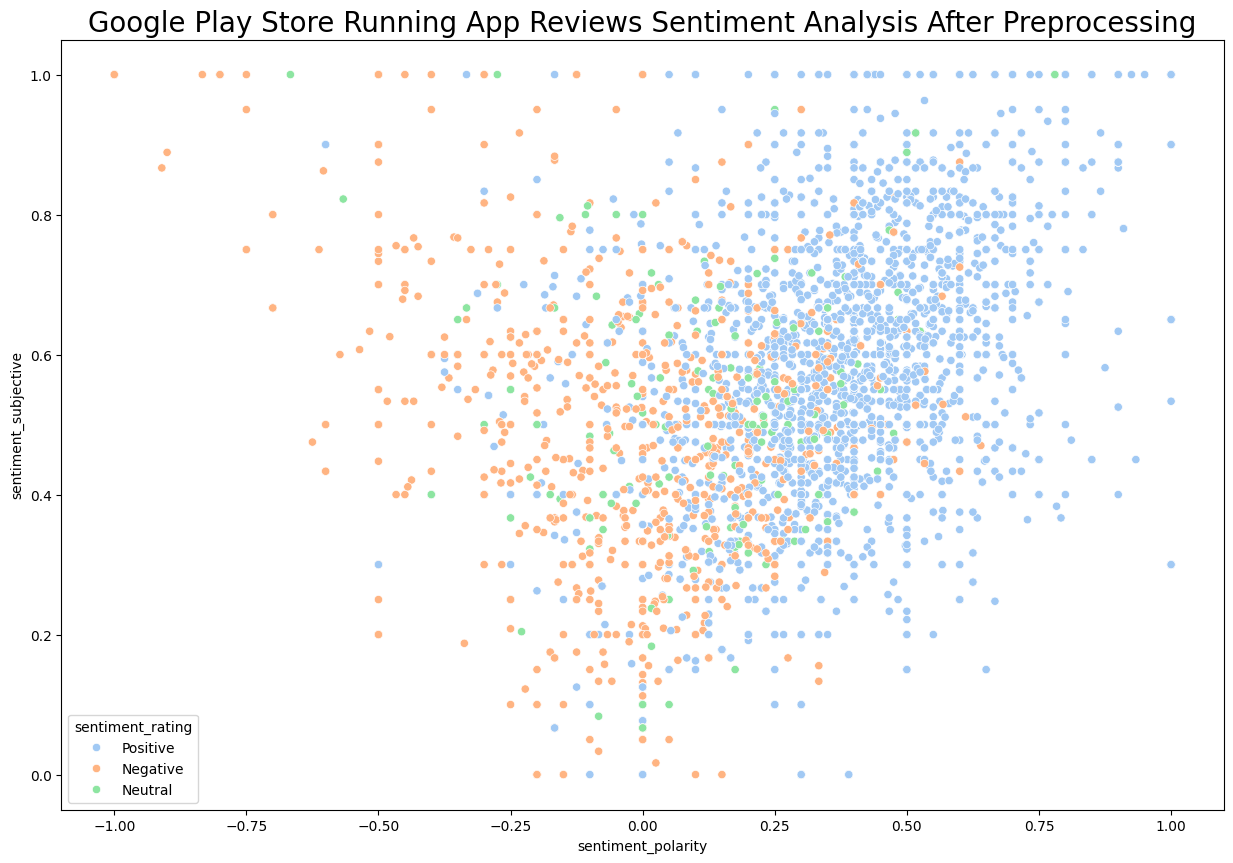

In [35]:
plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_cleaned['sentiment_polarity'], y=df_cleaned['sentiment_subjective'],
                hue=df_cleaned['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Running App Reviews Sentiment Analysis After Preprocessing", fontsize=20)
plt.show()

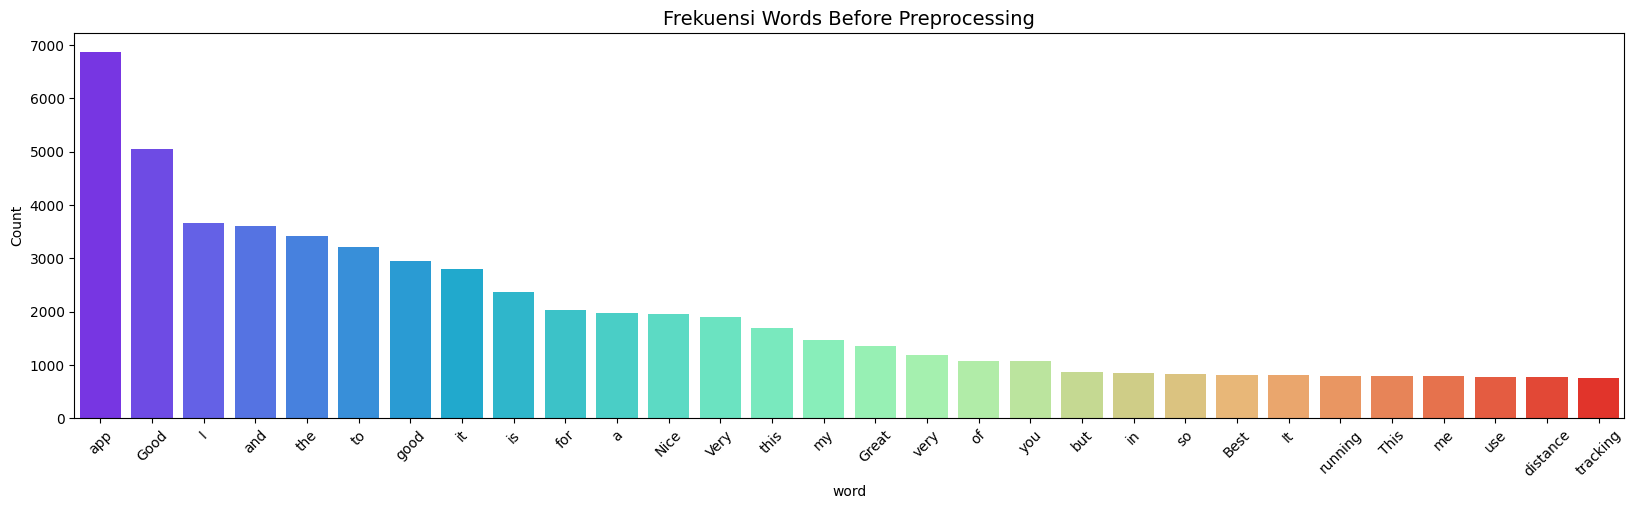

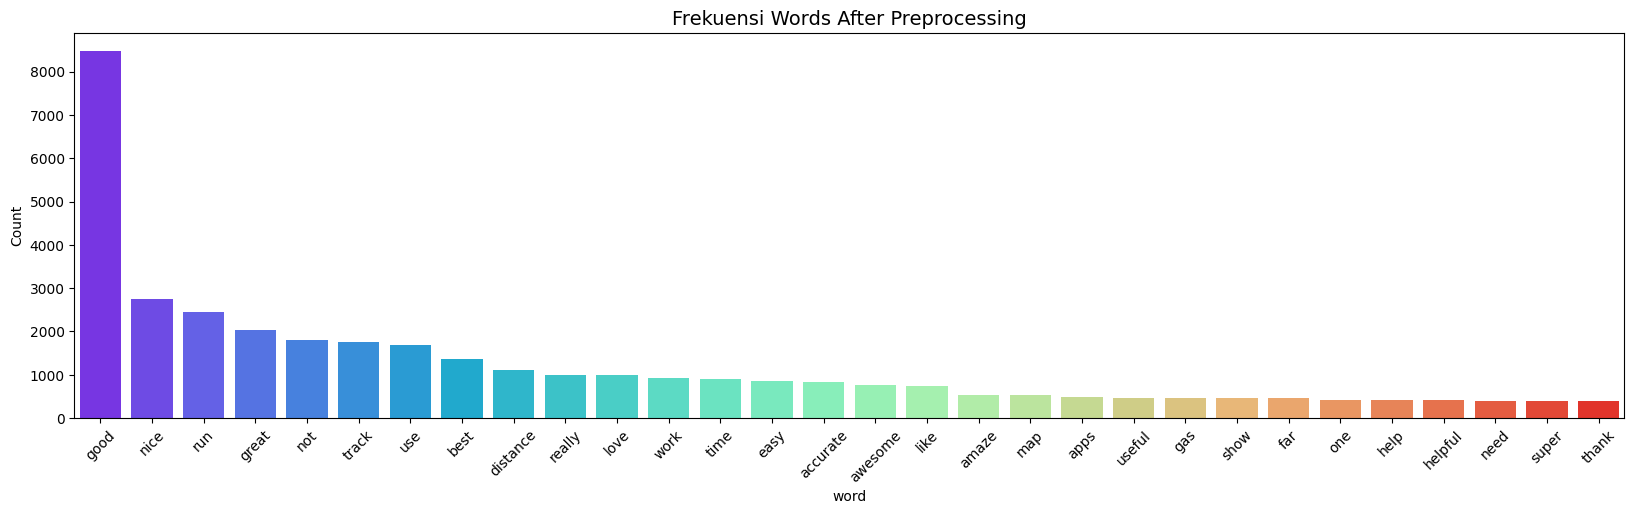

In [36]:
freq_words(df['content'], title="Frekuensi Words Before Preprocessing")
freq_words(df_cleaned['content_cleaned'], title="Frekuensi Words After Preprocessing") 

## 📌 **Save Data**

In [39]:
# Simpan DataFrame ke dalam folder data dengan path relatif 
output_path = "../data/2_preprocess_running_tracker.csv"
df_cleaned.to_csv(output_path, index=False, encoding="utf-8")

print(f"Data berhasil disimpan ke {output_path}")

Data berhasil disimpan ke ../data/2_preprocess_running_tracker.csv


In [40]:
# columns_to_keep = ["reviewId", "userName", "userImage", "score", "thumbsUpCount", 
#                    "reviewCreatedVersion", "at", "replyContent", "repliedAt", 
#                    "appVersion", "content_cleaned"]  

# # Buat DataFrame baru dengan hanya kolom yang diperlukan
# df_final = df[columns_to_keep].copy()

# # Simpan DataFrame ke dalam folder data dengan path relatif
# output_path = "../data/2_cleandata_running_tracker.csv"
# df_final.to_csv(output_path, index=False, encoding="utf-8")

# print(f"Data berhasil disimpan ke {output_path}")